# Image processing that evaluates more than one pixel at a time

Today we're going to look at a slightly more complex image filter, the __blur__ function.

First, we'll remind ourselvss how to work with Image objects. 

Please answer all Questions, marked with __Q__.

In [1]:
from PIL import Image       #need to import the Image Library

In [2]:
img = Image.new('RGB',(100,100),'white')   #Create a square, white image

How do you find the color in an image at a specific location?
Remember its something like <pre>
img.getpixel(( x,y )) </pre>
### Q Use __getpixel()__ to find the value of the red, green, and blue color channels at a particular x,y location.

In [6]:
value = img.getpixel((25,25))[:3]
print value

(255, 255, 255)


If you only want the Red value, what do you do?  
You get the first element in the tuple (by using a 0 in square brackets like this:)

<pre>
img.getpixel((40,50))[0]
</pre> 
### Q. What is the red channel value at location x=40, y= 50?

In [7]:
value = img.getpixel((25,25))[0]
print value

255


Now how would we iterate through the red, green, and blue values from a pixel?  
Since _getpixel_ returns at tuple with three values (r,g,b), we can use a for loop to grab the red value at index 0, the green value at index 1, and the blue value at index 2.

In [8]:
for i in range(0,3):   #get an arbitrary pixels R, G, B values using iteration
    print img.getpixel((40,50))[i]

255
255
255


In order to write a _blur_ function, we will have to think about what blurring an image means on the pixel level.
If an image is _sharp_, its pixels are distinct from nearby pixels. If an image is _blurry_, that means nearby pixels are similar in value. So that means we'll ahve to write a filter to look at all the surrounding pixels of a location, and try to change the pixel at that location to be more similar to the color of the pixels around it.

So first, we are going to rewrite our getpixel code so that it is generalized for any x,y value.
This just means using variables for _x_ and _y_ instead of the actual location.

In [9]:
x = 10
y = 20
img.getpixel((x , y)) [0]

255

So we can iterate each separate color value, try it for a red image and
confirm that isolating the channels is working.

In [10]:
red = Image.new('RGB',(100,100),'red') # a red image
for i in range(0,3):   #get an arbitrary pixels R, G, B values using iteration
    print red.getpixel((40,50))[i]

255
0
0


## Create the around function to get a value for the surrounding pixels
What it needs to do? For each pixel, make all the surrounding pixels more similar in color.

So create an expression for the colors in one channel of the _8_ surrounding pixels (i-viii).
<pre>
      x-1, x, x +1  < x location
     _____________
y-1 | i   ii  iii 
y   | iv  x,y  v
y+1 | vi  vii viii
^ 
y locations
</pre>

Using **getpixel(x,y) and the index[color_channel]**

The following function totals all the red values from the 8 pixels surrounding an x,y location.

Notice how the code is spcead out using \  backslash for continuing long lines so that 
this exprsion is easy to read

In [11]:
# Total of all the colors in the pixels surrounding x,y
around = img.getpixel((x - 1 , y - 1)) [0] + \
         img.getpixel((x     , y - 1)) [0] + \
         img.getpixel((x + 1 , y - 1)) [0] + \
         img.getpixel((x - 1 , y   )) [0] + \
         img.getpixel((x + 1 , y   )) [0] + \
         img.getpixel((x - 1 , y + 1)) [0] + \
         img.getpixel((x     , y + 1)) [0] + \
         img.getpixel((x + 1 , y + 1)) [0] 

In [12]:
img.show()  #confirm we have an all white image

In [13]:
img.putpixel((50,50),(0,0,0))  #add a black pixel in the middle of our white canvas

In [14]:
img.show()  #confirm that we have a black dot in the middle

Now we run __around__ to find he total value of the red channels around the black pixel should be 255 (full white)

In [15]:
x = 50
y = 50
print around   

2040


To get the average red channel of the pixels around the black pixel, we divide by a 8 (since there were 8 points we totalled up). Notice we use a float for precision.

In [16]:
print around / 8.0

255.0


But this location's color value should still be 0,0,0 (black)

In [17]:
img.getpixel((50,50) ) 

(0, 0, 0)

## Verify that we are doing the right math for addressing the surrounding pixels
<pre>
x-1, x, x +1
y-1  i   ii  iii 
y    iv  x,y  v
y+1  vi  vii viii
</pre>

We'll grab the pixel addresses around the pixel of interest x = 50, y = 50

In [18]:
print x-1, y-1
print  x , y-1
print x+1, y-1
print x-1, y
print  x , y
print x+1, y
print x-1, y+1
print  x , y+1
print x+1, y+1

49 49
50 49
51 49
49 50
50 50
51 50
49 51
50 51
51 51


And we'll confirm those values to make a square around our pixel, by manually adding a black pixel to show where around() took its data from.

In [19]:
img.putpixel((49,49),(0,0,0))
img.putpixel((49,50),(0,0,0))
img.putpixel((49,51),(0,0,0))
img.putpixel((50,51),(0,0,0))
img.putpixel((50,49),(0,0,0))
img.putpixel((51,49),(0,0,0))
img.putpixel((51,50),(0,0,0))
img.putpixel((51,51),(0,0,0))

In [20]:
# This should now show a 3x3 black square in the middle
img.show()

Now that we hav a working around function for red, we'll copy that and write a more genera expression for all the color channels area based on x,y.  Below we use an iterator to print out that we are getting the colors for the surrounding pixels (the black square).

What do we expect for each r,g,b value if we look at the pixels in the black box around our middle pixel?

In [21]:
x = 50
y = 50

In [22]:
for c in range(0,3):
    print '\t',c
    print img.getpixel((x - 1 , y - 1)) [c] 
    print img.getpixel((x     , y - 1)) [c] 
    print img.getpixel((x + 1 , y - 1)) [c] 
    print img.getpixel((x - 1 , y )) [c]
    print img.getpixel((x + 1 , y )) [c]
    print img.getpixel((x - 1 , y + 1)) [c] 
    print img.getpixel((x     , y + 1)) [c] 
    print img.getpixel((x + 1 , y + 1)) [c] 

	0
0
0
0
0
0
0
0
0
	1
0
0
0
0
0
0
0
0
	2
0
0
0
0
0
0
0
0


Now when we run the around function (copied below) again, our value for the middle pixel should be 0 (all black surrounding x,y)

In [23]:
around = img.getpixel((x - 1 , y - 1)) [0] + \
         img.getpixel((x     , y - 1)) [0] + \
         img.getpixel((x + 1 , y - 1)) [0] + \
         img.getpixel((x - 1 , y   )) [0] + \
            img.getpixel((x + 1 , y   )) [0] + \
            img.getpixel((x - 1 , y + 1)) [0] + \
            img.getpixel((x     , y + 1)) [0] + \
            img.getpixel((x + 1 , y + 1)) [0] 
around

0

Looking anywhere else in the image should give us a full red channel (155 for a white pixel).

In [24]:
x=25
y=25
around/8.0

0.0

## Q. Fill in the around function variables
So how do we write _around_ to iterate through all the colors?  Hint, you want to grab the first, second, and third values of the tuple using a list of integers.

In [48]:
#now go through all the colors
x=50
y=50
around = 0
for c in [0,1,2]:
    around = around + \
    img.getpixel((x - 1 , y - 1)) [c] + \
    img.getpixel((x     , y - 1)) [c] + \
    img.getpixel((x + 1 , y - 1)) [c] + \
    img.getpixel((x - 1 , y )) [c] + \
    img.getpixel((x + 1 , y )) [c] + \
    img.getpixel((x - 1 , y + 1)) [c] + \
    img.getpixel((x     , y + 1)) [c] + \
    img.getpixel((x + 1 , y + 1)) [c] 
around = around / 24

In [49]:
print around

0


### Convert into a function
Bundle the around code up into a function named _nearby_ for checking all the values nearby a location of an image.
__Note__ nearby takes two arguments, the 1st is the image and the 2nd is a tuple location inside the image.

In [50]:
def nearby(img,(x,y)):
    around = 0
    #we're going to add all the channels together for each surrounding pixel
    for c in [0,1,2]:     
        around = around + \
        img.getpixel((x - 1 , y - 1)) [c] + \
        img.getpixel((x     , y - 1)) [c] + \
        img.getpixel((x + 1 , y - 1)) [c] + \
        img.getpixel((x - 1 , y )) [c] + \
        img.getpixel((x + 1 , y )) [c] + \
        img.getpixel((x - 1 , y + 1)) [c] + \
        img.getpixel((x     , y + 1)) [c] + \
        img.getpixel((x + 1 , y + 1)) [c] 
    around = around / 24.0     #divide by 24 to get the average
    return around

In [51]:
img = Image.new('RGB', (100,100), 'white')  #get a white image

In [52]:
nearby(img,(40,50))

255.0

Try it on a non-obvious image

In [54]:
ourimage  = Image.open('apples.png')

In [55]:
ourimage.size  #need to make sure our nearby function operates inside the image boundaries

(100, 100)

In [56]:
nearby(ourimage,(62,65))

197.91666666666666

No errors, seems believable

Now, in order for us to make the pixel more like the surrounding pixels, we actually want to change the pixel by the difference betwen it and the surrounding average. 

## Difference function
So for this reason, we'll alter our nearby frunction to keep track of the pixel color at the loation we are looking at and return the difference between that pixel value and the average of its neighbors. We'll later change the pixel in question by that amount.

In [57]:
def differ(img,(x,y)):
    current = 0
    around = 0
    for c in [0,1,2]:
        current = current + img.getpixel((x,y))[c]  #grab the color at that location
        around = around + \
        img.getpixel((x - 1 , y - 1)) [c] + \
        img.getpixel((x     , y - 1)) [c] + \
        img.getpixel((x + 1 , y - 1)) [c] + \
        img.getpixel((x - 1 , y )) [c] + \
        img.getpixel((x + 1 , y )) [c] + \
        img.getpixel((x - 1 , y + 1)) [c] + \
        img.getpixel((x     , y + 1)) [c] + \
        img.getpixel((x + 1 , y + 1)) [c] 
    around = around / 24.0
    return around - (current/3.0)  #returns how different it is from its neighbors

In [58]:
differ(ourimage,(56,82)) #somewhere surrounded by black

12.708333333333336

In [59]:
differ(ourimage,(72,62)) #somewhere where its very different from neighbors

6.916666666666671

In [60]:
differ(ourimage,(71,61))

13.999999999999993

In [61]:
ourimage.show() #use IRFanview to confirm

## Now we can continue with writing the blur function.
The blur function will look at every pixel and modify the pixel to be like its neighbors according to the differ function.  
__Note we need to make a new image to write into.__ We'll have to write our modificationss into a new image, otherwise our calucations might take into account surounding pixels that have already been blurred.

In [62]:
def blur(img):
    blurred = Image.new('RGB', img.size) #create a new image
    for x in range( 1,img.size[0] ):
        for y in range( 1, img.size[1] ):
            (r , g ,b) = img.getpixel((x,y))[:3]
            change =  differ(img, (x,y)) / 2  #use our differ function to get change, divide by 2
            blurred.putpixel((x,y), (r + change, g + change, b + change))
    return blurred

In [63]:
blur(ourimage)

TypeError: integer argument expected, got float

### Note the 'integer argument' error. Remember that pixel color values need to be integers. A pixel location with a float value wouldn't make any sense.

In [64]:
#how to change a floating point value to an integer
#use an int() conversion method
int(500.2) 

500

In [67]:
def blur(img):
    blurred = Image.new('RGB', img.size) #create a copy because we want to refer to a clean copy
    for x in range( 1,img.size[0] ):
        for y in range( 1, img.size[1] ):
            (r , g ,b) = img.getpixel((x,y))[:3]
            change =  int(differ(img, (x,y)) / 2 ) #use our differ function to get change
            blurred.putpixel((x,y), (r + change, g + change, b + change))
    return blurred

In [68]:
blur(ourimage)

IndexError: image index out of range

### Note the index out of range error. Are we trying to query something out of the bounds of the image?

Take a look at the solution below. Notice anything interesting about the input to the range function?

In [69]:
#remove that index error!
def blur(img):
    blurred = Image.new('RGB', img.size)  
    for x in range( 1, img.size[0] - 1):
        for y in range(1, img.size[1] - 1):
            (r , g ,b) = img.getpixel((x,y))[:3]
            change =  int(differ(img, (x,y)) / 2.0)
            blurred.putpixel((x,y), (r + change, g + change, b + change))
    return blurred

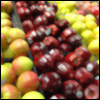

In [70]:
blur(ourimage)

In [71]:
blurred = blur(ourimage)   
blurred.save('blurredapple.png') #save it out and compare

### Note on integer division-- its truncating the decimal instaed of rounding
We don't want to truncate the decimal, so need to round to nearest integer, so use round

In [72]:
ratio = 120.7
int(ratio)

120

In [73]:
round(ratio)  #Much better

121.0

In [74]:
#Our rounded off change
def blur(img):
    blurred = Image.new('RGB', img.size) 
    for x in range( 1, img.size[0] - 1):
        for y in range(1, img.size[1] - 1):
            (r , g ,b) = img.getpixel((x,y))[:3]
            change =  differ(img, (x,y)) / 2.0
            change = int(round(change))  #so we cast to integer after we round off
            blurred.putpixel((x,y), (r + change, g + change, b + change))
    return blurred

### Now lets play with a new image where we can more clearly see the blur effect.

In [75]:
twoline = Image.new('RGB',(100,100),'white')

In [76]:
for x in range(0, twoline.size[0]):
    for y in range(0, twoline.size[1]):
        twoline.putpixel((x,50),(0,0,0))
        twoline.putpixel((50,y),(255,0,0))
        
twoline.save('twoline.png')
twoline.show()

In [77]:
twoline = blur(twoline)

In [78]:
twoline.show()
twoline.save('twoline_blurred.png')

In [79]:
apple = Image.open('apple.png')
apple.show()

In [80]:
apple = blur(apple)

In [81]:
apple.show()
apple.save('apple_blurred.png')

### Preserve transparency by isolating the alpha and adding it back in.

Recall hat alpha is the fourth element in a tuple. So we'll use a slice to first grab only the first three channels with the RGB [:3] and then grab the alpha [3:] (the fourth element)

Also note that we will crate a nw image that contains the Alpha channel (mode 'RGBA')

In [82]:
#preserve transparency
def blur(img):
    blurred = Image.new('RGBA', img.size) 
    for x in range( 1, img.size[0] - 1):
        for y in range(1, img.size[1] - 1):
            (r , g ,b) = img.getpixel((x,y))[:3]   #Grab only the RGB
            alpha = img.getpixel((x,y))[3:]       #Isolat ethe Alpha
            change =  differ(img, (x,y)) / 2.0
            change = int(round(change))
            newpixel = (r + change, g + change, b + change) + alpha  #add it back in
            blurred.putpixel((x,y),  newpixel )
    return blurred

In [83]:
apple = Image.open('apple.png')
apple.show()

In [84]:
apple = blur(apple) #this takes some time to process
apple.show()  #note that preview doesn't show alpha well
apple.save('apple_blurred_trans.png')

In [85]:
for i in range(0,20):  #do it a bunch of times to make sure its happening
    apple = blur(apple)
    apple.save('apple_20blur.png')

__Bonus Point Q__ Which of the image manipulations have we worked on in the past that does not require every pixel to be visited? In what cases must every pixel be read and/or written and in what cases can some pixels ignored.

You might think someone should have already written invert, flipping, bluring, etc. You are right!
Use the ImageOps module (functions) from the Python Imaging Library

In [ ]:
from PIL import Image

In [ ]:
import PIL.ImageOps

In [ ]:
img = Image.open('twoline.png')

In [ ]:
inverted = PIL.ImageOps.invert(img)

In [ ]:
inverted.save('inverted.png')

So why did we just do all that low-level pixel toggling? Because its good to know how to do it if you ever want to write your own custom filter, and also givs us experience with loops and tuples. ImageOps is optimized and well tested, and well documented

http://pillow.readthedocs.io/en/3.1.x/reference/ImageOps.html
and

http://effbot.org/imagingbook/imageops.htm

### Download an image file through code

How to __download a file from the internet using python__.  In a previous class, you saw 
wget from the command line.   You can also use the __urllib__  (URL Library) with two string arguements:

<pre>import urllib
urllib.retriev('http://remoteaddres.com/image.jpg",'localfile.jpg')
the first is the url and the second the local filename you want it to save to:

In [86]:
import urllib

urllib.urlretrieve("http://web.engr.oregonstate.edu/~mjb/glman/rainbow3.jpg", "teapot.jpg")

('teapot.jpg', <httplib.HTTPMessage instance at 0x000000000664F188>)

In [87]:
img = Image.open('teapot.jpg')

In [88]:
apple = Image.open('apple.png')

### Q. Download 2 image files from the internet using python

In [90]:
urllib.urlretrieve("http://www.bepste.in/PCSpecs.png", "PCSpecs.png")

('PCSpecs.png', <httplib.HTTPMessage instance at 0x00000000066AF908>)

In [92]:
PCSpecs = Image.open('PCSpecs.png')

In [98]:
PCSpecs.show()


In [99]:
urllib.urlretrieve("https://assets-cdn.github.com/images/modules/logos_page/GitHub-Mark.png", "github.png")
github = Image.open('github.png')
github.show()

###  Checkerboard code, bundled up into a function.

In [100]:
def checkerboard(img1,img2):
    img1 = img1.resize((200,200))
    img2 = img2.resize((200,200))
    background = Image.new('RGB',(1000,1000),'white')
    #background.show()
    print background.size  #we made a big background
    i = 0  #counter
    for left in range( 0, 1000 , 200):
        for top in range( 0, 1000, 200):
            if i%2 == 0:
                background.paste(img1,(left,top))  #every even number, paste the pig
            else:
                background.paste(img2,(left,top)) #ever odd number, paste the duck
            i+=1  #increment the counter
    return background

In [101]:
mycheck = checkerboard(apple,img)

(1000, 1000)


In [102]:
mycheck.save('appleteapots.jpg')

### Optional Q. Make a checkerboard imagee and save it.  (If you didn't get to this in Lecture 11)

### Meme generator

In [106]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [107]:
# package up into a function
def memerson(myimage,caption):
    "memerson(image, string) -  takes an image and a string caption, and returns a meme"
    # create a canvas for the overlay text
    draw = ImageDraw.Draw(myimage)
    # configure text propoerties
    font = ImageFont.truetype('Arial.ttf', 20)
    textwidth, textheight = draw.textsize(caption, font)
    color = "navy"
    margin = 10
    x = myimage.size[0] - textwidth - margin
    y = myimage.size[1] - textheight - margin
    # draw text on top of our image
    draw.text((x, y), caption, fill=color, font=font)
    return myimage

In [108]:
mymeme = memerson(apple,"think tank")

IOError: cannot open resource

In [ ]:
mymeme.save('thinkapple.png')

### Q.  Create a meme using an image of your choice.  Feel free to change the margin, color, and other parameters of the function above. 
Here's an example of how you call it:

In [ ]:
## Your turn!

# Processing many images in a directory
We're going to create  directory first so that we don't overwrite something we care about.
Then we'll import the _glob_ library to help us get very file in a directory.

In [ ]:
mkdir lotsofimages  #Only run this once

### Copy some images into this directory 
(but make sure you __keep a copy because these images may be altered by what we do next). 
You can download an example "lots of images" form here:

In [ ]:
cd lotsofimages    #change into that directory

In [ ]:
ls       #Verify you're in the correct directory

In [ ]:
import glob       # Use python to get a list of all the files
mask = r'*.[jp][pn][g]'  # a little regex to se the files-- I only have jpg, but ou might have  mix
file_list = glob.glob(mask)
for filename in file_list:
    print filename

### Now run a custom filter on the list of files that glob found in that directory

In [ ]:
def old_skool(pngimage):  
    for x in range(pngimage.size[0]):
        for y in range(pngimage.size[1]):
            (r, g, b) = pngimage.getpixel((x,y))[:3]
            alpha = pngimage.getpixel((x,y))[3:]
            pngimage.putpixel((x, y), ( r - 122 , g + 122, b - 122 ) + alpha)

In [ ]:
import glob  
file_list = glob.glob('*.jpg')
for filename in file_list:
    current = Image.open(filename)
    old_skool(current)
    current.save('oldskool'+filename)

### Q. Submit this file  and accompanying generated images
Include this file, all images generated in this file, along with the "lotsofimagess" folder.

See here if you don't know how to do this:
On Mac:   http://osxdaily.com/2012/01/10/how-to-zip-files-in-mac-os-x/
On Windows: https://www.lifewire.com/how-to-zip-files-in-windows-3507020

In [ ]:
cd ..

In [ ]:
## Check your output
import webbrowser as wb
path = %pwd

In [ ]:
wb.open(path)   #on Windows

In [ ]:
wb.open('file:///'+path)  #on Macs